<a href="https://colab.research.google.com/github/LisavanEijk/PRA3024/blob/master/Week_2_PRA3024_Particle_physics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This file and the ones uploaded before this one are not yet the final file for submission for week 2 (they are just tests for using github and saving my progress with the code). The real submission will, instead of saying 'Gemaakt met colaboratory' say 'Submission week 2 PRA3024 Particle physics'. 

In [1]:
# This block only needs to be run once
!pip install uproot awkward lz4 xxhash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.4/328.4 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.2/583.2 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 32.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.6 MB/s eta 0:00:00


This block imports all neccessary packages and imports the magnet down file from my drive.  

In [55]:
import uproot
from numpy import *
import matplotlib.pyplot as plt

f=uproot.open("/content/drive/MyDrive/B2HHH_MagnetUp.root")
f.keys()


['DecayTree;1']

The following two blocks are copied from the link in the announcement, since they showed me how to see which variables are in the magnet down file, as well as how to access these variables. 

In [56]:
f["DecayTree"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
B_FlightDistance     | double                   | AsDtype('>f8')
B_VertexChi2         | double                   | AsDtype('>f8')
H1_PX                | double                   | AsDtype('>f8')
H1_PY                | double                   | AsDtype('>f8')
H1_PZ                | double                   | AsDtype('>f8')
H1_ProbK             | double                   | AsDtype('>f8')
H1_ProbPi            | double                   | AsDtype('>f8')
H1_Charge            | int32_t                  | AsDtype('>i4')
H1_IPChi2            | double                   | AsDtype('>f8')
H1_isMuon            | int32_t                  | AsDtype('>i4')
H2_PX                | double                   | AsDtype('>f8')
H2_PY                | double                   | AsDtype('>f8')
H2_PZ                | double                   | AsDtype(

['B_FlightDistance',
 'B_VertexChi2',
 'H1_PX',
 'H1_PY',
 'H1_PZ',
 'H1_ProbK',
 'H1_ProbPi',
 'H1_Charge',
 'H1_IPChi2',
 'H1_isMuon',
 'H2_PX',
 'H2_PY',
 'H2_PZ',
 'H2_ProbK',
 'H2_ProbPi',
 'H2_Charge',
 'H2_IPChi2',
 'H2_isMuon',
 'H3_PX',
 'H3_PY',
 'H3_PZ',
 'H3_ProbK',
 'H3_ProbPi',
 'H3_Charge',
 'H3_IPChi2',
 'H3_isMuon']

In [5]:
f["DecayTree/H1_PX"].array()

<Array [1.04e+03, -318, -97.8, ..., 1.47e+03, 817] type='3420295 * float64'>

In [6]:

f["DecayTree/H1_PX"].array(library="np")

array([1038.63435383, -318.15769589,  -97.80224766, ...,  126.55972473,
       1469.84647106,  816.63465142])

From here, my code for the exercises from the assignment can be found. 
Exercise 1: Why are we here?
The first block calculates the total momentum of daughter particle 1 (H1) and plots this as a histogram 

Text(0.5, 1.0, 'Total momentum daughter particle 1')

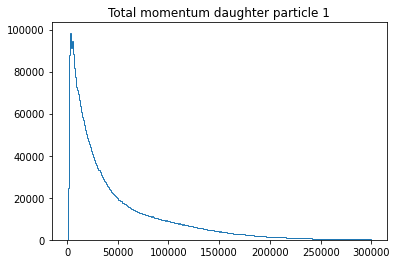

In [7]:
# Momenta daughter particle 1 in x, y and z direction
H1_PX=f["DecayTree/H1_PX"].array(library="np")
H1_PY=f["DecayTree/H1_PY"].array(library="np")
H1_PZ=f["DecayTree/H1_PZ"].array(library="np")
# Formula total momentum daughter particle 1
H1_Ptot=sqrt(H1_PX**2 + H1_PY**2 + H1_PZ**2)
# Plotting total momentum daughter particle 1 as histogram
plt.hist(H1_Ptot, 300, (0,300000), histtype=u'step');
plt.title("Total momentum daughter particle 1")


 This block plots the momentum of the mother particle (M_Ptot)

Text(0.5, 1.0, 'Total momentum mother particle')

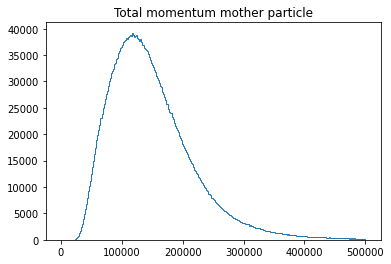

In [8]:
# Getting momenta daughter particles 2 and 3 as variables
H2_PX = f["DecayTree/H2_PX"].array(library="np")
H3_PX = f["DecayTree/H3_PX"].array(library="np")
H2_PY = f["DecayTree/H2_PY"].array(library="np")
H3_PY = f["DecayTree/H3_PY"].array(library="np")
H2_PZ = f["DecayTree/H2_PZ"].array(library="np")
H3_PZ = f["DecayTree/H3_PZ"].array(library="np")
# Calculation for momentum mother particle
M_Ptot = sqrt((H1_PX + H2_PX + H3_PX)**2 + (H1_PY + H2_PY + H3_PY)**2 + (H1_PZ + H2_PZ + H3_PZ)**2)
# Plotting momentum mother particle
plt.hist(M_Ptot, 300, (0,500000), histtype=u'step');
plt.title("Total momentum mother particle")

 This block plots the range of masses for the B-meson. 

Text(0.5, 1.0, 'Mass distribution B-meson')

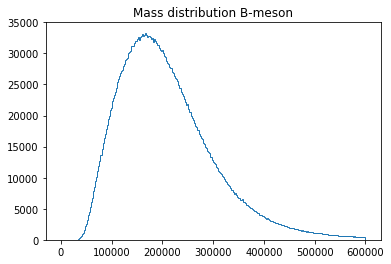

In [66]:
# Energies of daughter particles 1, 2 and 3, assuming the mass of each daughter particle is that of a Kaon: 497.61 MeV (in natural units)(Binas 6th edition, table 26C)
# Energy of daughter particle is square root(mass daughter particle squared + total momentum daughter particle squared)
E1 = sqrt(497.61**2 + (sqrt((H1_PX**2) + (H1_PY**2) + (H1_PZ**2)))**2)
E2 = sqrt(497.61**2 + (sqrt((H2_PX**2) + (H2_PY**2) + (H2_PZ**2)))**2)
E3 = sqrt(497.61**2 + (sqrt((H3_PX**2) + (H3_PY**2) + (H3_PZ**2)))**2)
# Energy of the B-meson (mother particle) is the sum of the energies of the daughter particles
Bmeson_E = E1 + E2 + E3
# Mass of B-meson is square root(energy B-meson squared + momentum B-meson squared)
Bmeson_M = sqrt(Bmeson_E**2 + M_Ptot**2)
# Plotting mass B-meson
plt.hist(Bmeson_M, 300, (0,600000), histtype=u'step');
plt.title("Mass distribution B-meson")
# This mass is too high for the B-meson. This is because also muons are taken into account in the calculation, while they should not be taken into account

The first two blocks plot the probability whether each daughter particle is a Kaon or Pion. The third block plots B_VertexChi2 for all particles. 

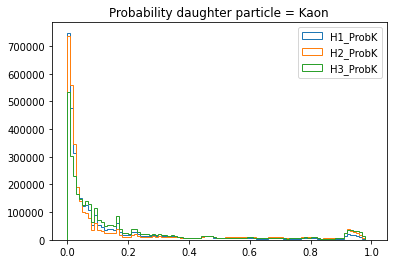

In [10]:
# Getting the variables from the magnet down file

H1_ProbK = f["DecayTree/H1_ProbK"].array(library="np")
H2_ProbK = f["DecayTree/H2_ProbK"].array(library="np")
H3_ProbK = f["DecayTree/H3_ProbK"].array(library="np")
H1_ProbPi = f["DecayTree/H1_ProbPi"].array(library="np")
H2_ProbPi = f["DecayTree/H2_ProbPi"].array(library="np")
H3_ProbPi = f["DecayTree/H3_ProbPi"].array(library="np")

# First block: Plotting the probability of each daughter particle being a Kaon (in one plot)
plt.hist(H1_ProbK, 100, (0,1), histtype=u'step');
plt.hist(H2_ProbK, 100, (0,1), histtype=u'step');
plt.hist(H3_ProbK, 100, (0,1), histtype=u'step');
plt.title("Probability daughter particle = Kaon")
plt.legend(['H1_ProbK', 'H2_ProbK', 'H3_ProbK'])
plt.show()


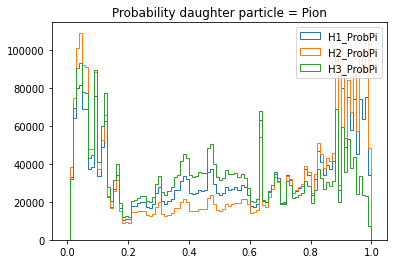

In [11]:
# Second block: Plotting the probability of each daughter particle being a Pion (in one plot)
plt.hist(H1_ProbPi, 100, (0,1), histtype=u'step');
plt.hist(H2_ProbPi, 100, (0,1), histtype=u'step');
plt.hist(H3_ProbPi, 100, (0,1), histtype=u'step');
plt.title("Probability daughter particle = Pion")
plt.legend(['H1_ProbPi', 'H2_ProbPi', 'H3_ProbPi'])
plt.show()

Text(0.5, 1.0, 'B_VertexChi2')

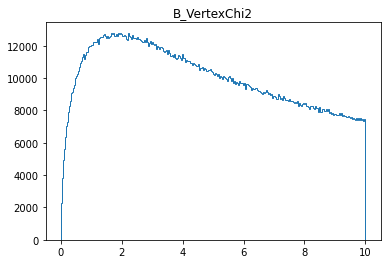

In [13]:
# Third block: Plotting B_VertexChi2
B_VertexChi2 = f["DecayTree/B_VertexChi2"].array(library="np")
plt.hist(B_VertexChi2, 300, (0,10), histtype=u'step');
plt.title("B_VertexChi2")

This block makes the pre-selection and applies this to the new decay tree 'cut_tree'.  

In [63]:

cut_tree = f["DecayTree"].arrays(cut = "(H1_ProbPi>0.5) & (H2_ProbPi>0.5) & (H3_ProbPi>0.5) & (H1_isMuon == 0) & (H2_isMuon == 0) & (H3_isMuon == 0)", library = "np")
# Checking which keys are in the cut_tree, as well as their values, to see if the cut worked. 
dict(cut_tree)

# f["DecayTree/H1_PX"].array()

# https://github.com/scikit-hep/uproot5/issues/194
# https://masonproffitt.github.io/uproot-tutorial/aio/index.html

{'B_FlightDistance': array([12.48938115,  4.67896165,  8.59131947, ..., 42.76645477,
         3.49611985,  8.43893257]),
 'B_VertexChi2': array([9.30393736, 7.56355017, 9.37822256, ..., 3.48487211, 2.04638573,
        7.8439232 ]),
 'H1_PX': array([  -97.80224766, -1792.32354848,   583.98369116, ...,
         1787.07339575,   512.62536544,   816.63465142]),
 'H1_PY': array([ 199.04366567, -538.18942249,  222.63333397, ..., 1165.57237078,
         964.35976048,  368.77402216]),
 'H1_PZ': array([ 4381.61108132, 89001.7980122 , 13836.50226102, ...,
        99980.21713623, 54624.45313707, 14055.76821297]),
 'H1_ProbK': array([0.0637086 , 0.32932657, 0.00856617, ..., 0.31599095, 0.06426549,
        0.00679082]),
 'H1_ProbPi': array([0.86789846, 0.54065335, 0.98793274, ..., 0.72673178, 0.81515902,
        0.8685807 ]),
 'H1_Charge': array([ 1,  1, -1, ..., -1, -1, -1], dtype=int32),
 'H1_IPChi2': array([1.15418018e+00, 4.31774603e+00, 3.23764375e+00, ...,
        1.61113754e+03, 4.96604328e+

This block plots the B-meson mass calculated via the uncut DecayTree and the B-meson mass calculated via the cut_tree. 

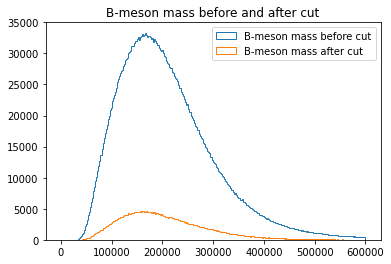

In [65]:
# Getting the variables from the cut_tree.
H1_PX_cut = cut_tree['H1_PX']
H1_PY_cut = cut_tree['H1_PY']
H1_PZ_cut = cut_tree['H1_PZ']
H2_PX_cut = cut_tree['H2_PX']
H2_PY_cut = cut_tree['H2_PY']
H2_PZ_cut = cut_tree['H2_PZ']
H3_PX_cut = cut_tree['H3_PX']
H3_PY_cut = cut_tree['H3_PY']
H3_PZ_cut = cut_tree['H3_PZ']
# Energies of daughter particles 1, 2 and 3 after cut.
E1_cut = sqrt(497.61**2 + (sqrt((H1_PX_cut**2) + (H1_PY_cut**2) + (H1_PZ_cut**2)))**2)
E2_cut = sqrt(497.61**2 + (sqrt((H2_PX_cut**2) + (H2_PY_cut**2) + (H2_PZ_cut**2)))**2)
E3_cut = sqrt(497.61**2 + (sqrt((H3_PX_cut**2) + (H3_PY_cut**2) + (H3_PZ_cut**2)))**2)
# Energy of the B-meson after cut.
Bmeson_E_cut = E1_cut + E2_cut + E3_cut
# Mass of B-meson after cut.
M_Ptot_cut = sqrt((H1_PX_cut + H2_PX_cut + H3_PX_cut)**2 + (H1_PY_cut + H2_PY_cut + H3_PY_cut)**2 + (H1_PZ_cut + H2_PZ_cut + H3_PZ_cut)**2)
Bmeson_M_cut = sqrt(Bmeson_E_cut**2 + M_Ptot_cut**2)
# Plotting mass B-meson. This was already calculated before. 
plt.hist(Bmeson_M, 300, (0,600000), histtype=u'step');
# Plotting mass B-meson after cut. 
plt.hist(Bmeson_M_cut, 300, (0,600000), histtype=u'step');
# Setting up legend, title and combining the plots. 
plt.title("B-meson mass before and after cut")
plt.legend(['B-meson mass before cut', 'B-meson mass after cut'])
plt.show()
# The peak of the mass after the cut is much smaller, because the contribution of the muons is left out of the calculations (as instructed). 
# This new peak is much more reasonable, since the mass of the B-meson should be around 5279 MeV (Binas 6th edition, table 26C)